In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import sys 
print(sys.version)


3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:DML:0


In [4]:
tf.test.is_gpu_available()


True

In [5]:
import tensorflow as tf
print(tf.__version__)

1.15.5


In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import glob 

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [7]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6390720263011700276,
 name: "/device:DML:0"
 device_type: "DML"
 memory_limit: 7282832180
 locality {
 }
 incarnation: 4928286089803649671
 physical_device_desc: "{\"name\": \"NVIDIA GeForce GTX 1080\", \"vendor_id\": 4318, \"device_id\": 7040, \"driver_version\": \"30.0.15.1165\"}",
 name: "/device:DML:1"
 device_type: "DML"
 memory_limit: 7449837620
 locality {
 }
 incarnation: 5248928020928076066
 physical_device_desc: "{\"name\": \"Intel(R) HD Graphics 630\", \"vendor_id\": 32902, \"device_id\": 22802, \"driver_version\": \"26.20.100.8142\"}"]

In [8]:
Images = Path('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_Images/ALL_Horizon_Images')


In [9]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)

In [10]:
cl = pd.read_csv('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_K/All_Horizon_L_V_R.csv')
cl_Left = cl.iloc[:,3].values
y_left = np.array(cl_Left)

y_left_V = y_left.reshape(5106 ,1)
len (y_left_V) 
y_left_V = y_left_V.reshape( 1, 5106 )
yl = y_left_V_s= pd.Series(y_left,name= 'yl')/100

print (y_left_V_s)

0       5.63
1       5.53
2       5.45
3       5.40
4       5.42
        ... 
5101    8.88
5102    8.90
5103    8.94
5104    8.96
5105    8.96
Name: yl, Length: 5106, dtype: float64


In [11]:
cl_right = cl.iloc[:,4].values
y_right =  np.array(cl_right)
y_right_V = y_right.reshape(5106,1)
len (y_right_V)
type(y_right_V)
yr= y_right_V_s= pd.Series(y_right, name= 'yr')/100
print (y_right_V_s)

0       6.59
1       6.67
2       6.70
3       6.71
4       6.70
        ... 
5101    3.23
5102    3.23
5103    3.22
5104    3.22
5105    3.22
Name: yr, Length: 5106, dtype: float64


In [12]:
type (yr)

pandas.core.series.Series

In [13]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)
print (filepaths)
type(filepaths)

0       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
1       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
2       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
3       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
4       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
                              ...                        
5101    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5102    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5103    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5104    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5105    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
Name: Filepath, Length: 5106, dtype: object


pandas.core.series.Series

In [14]:


ALL_Data = pd.concat([filepaths,yl,yr], axis = 1).sample(frac = 1.0, random_state=1).reset_index(drop=True)
print(ALL_Data)

                                               Filepath     yl     yr
0     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   9.35   3.25
1     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  10.28   3.23
2     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   7.21   2.97
3     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.24   5.01
4     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.51   5.19
...                                                 ...    ...    ...
5101  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   4.93   5.56
5102  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.13   5.43
5103  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   2.19  10.83
5104  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  12.74   4.11
5105  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   3.79   8.50

[5106 rows x 3 columns]


In [15]:
train_Data, test_Data = train_test_split(ALL_Data, train_size = 0.7, shuffle = True, random_state = 1  )

In [16]:
print('The number of training Data = ',len(train_Data))

The number of training Data =  3574


In [17]:
print(train_Data)


                                               Filepath    yl     yr
1785  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.61   3.72
2161  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  6.35   2.14
605   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.84  10.24
4963  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.88   4.76
3584  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.43   4.76
...                                                 ...   ...    ...
2895  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.51   1.20
2763  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.31   7.86
905   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  5.17   5.66
3980  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.67  11.58
235   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.11   9.29

[3574 rows x 3 columns]


In [18]:
print(test_Data)


                                               Filepath    yl    yr
5073  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.43  5.26
3570  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.41  5.62
4428  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  8.19  5.42
2107  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  8.95  3.17
2185  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.34  1.08
...                                                 ...   ...   ...
568   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.95  7.18
5038  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.98  5.43
4900  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  6.58  1.58
376   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.13  8.19
2819  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  5.02  5.64

[1532 rows x 3 columns]


In [19]:
print('The number of test Data = ',len(test_Data))

The number of test Data =  1532


# # # # ****Loading Images****

In [20]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [21]:
train_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
     y_col=['yl','yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe= test_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(128, 102),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=12,
    shuffle=False
)

Found 2860 validated image filenames.
Found 714 validated image filenames.
Found 1532 validated image filenames.


In [22]:
inputs = tf.keras.Input(shape=(128, 102,1))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.Dense(64)(x)
outputs = tf.keras.layers.Dense(2)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


# outputs_1 =  tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=(outputs))

model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 102, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 102, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 51, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 49, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 24, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
____________________________________________

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
model.compile(
    optimizer='adam',
    loss=['mse'],
   metrics=['mse','mae', 'mape']
)


In [25]:
history = model.fit(
    train_images,
    validation_data=val_images,
#       batch_size=64,
    epochs= 300,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
)

Epoch 1/300
239/239 [==============================] - 29s 121ms/step - loss: 7.4424 - mean_squared_error: 7.4553 - mean_absolute_error: 1.9928 - mean_absolute_percentage_error: 741781.5625 - val_loss: 5.9867 - val_mean_squared_error: 5.9861 - val_mean_absolute_error: 1.7644 - val_mean_absolute_percentage_error: 52.7751
Epoch 2/300
239/239 [==============================] - 28s 116ms/step - loss: 5.7603 - mean_squared_error: 5.7501 - mean_absolute_error: 1.7191 - mean_absolute_percentage_error: 859618.1250 - val_loss: 5.7152 - val_mean_squared_error: 5.7139 - val_mean_absolute_error: 1.7009 - val_mean_absolute_percentage_error: 53.2743
Epoch 3/300
239/239 [==============================] - 31s 129ms/step - loss: 5.4664 - mean_squared_error: 5.4643 - mean_absolute_error: 1.6635 - mean_absolute_percentage_error: 1060878.8750 - val_loss: 5.3002 - val_mean_squared_error: 5.2983 - val_mean_absolute_error: 1.6479 - val_mean_absolute_percentage_error: 48.4879.9356 - mean_squared_error: 4.9356

In [80]:

from tensorflow.keras.models import load_model
filename = "RELU2_model.joblib"
model.save(filename)
loded_model_RELU= load_model("RELU_model.joblib")

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error'])


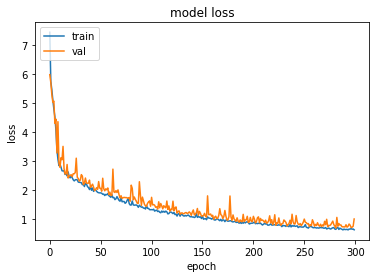

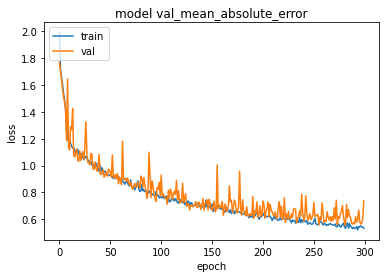

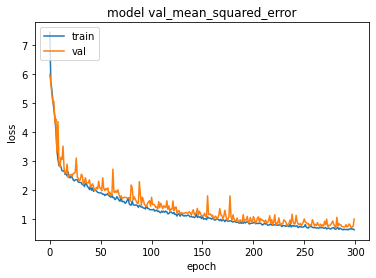

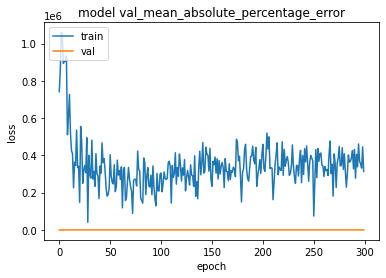

In [27]:

import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy

###Val_Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model val_mean_absolute_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model val_mean_squared_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model val_mean_absolute_percentage_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
predicted_coordination = np.squeeze(model.predict(test_images))*100
true_coordination = test_images.labels*100
print('--> The predected Coordination:')
print (predicted_coordination)
print('--> The real Coordination:')
print(true_coordination)
print ('--> The averge Error')

rmse = np.sqrt(model.evaluate(test_images, verbose=1))

print("     Test RMSE: ")

print (rmse)

r2 = r2_score(true_coordination, predicted_coordination)

print("    Test R^2 Score: ")

print (r2)

--> The predected Coordination:
[[413.92456 578.4842 ]
 [745.5264  491.79816]
 [746.9485  487.34268]
 ...
 [587.84015 231.43369]
 [292.5625  959.04865]
 [393.04337 698.50824]]
--> The real Coordination:
[[443. 526.]
 [741. 562.]
 [819. 542.]
 ...
 [658. 158.]
 [313. 819.]
 [502. 564.]]
--> The averge Error
128/128 [==============================] - 11s 87ms/step - loss: 1.0508 - mean_squared_error: 1.0522 - mean_absolute_error: 0.7327 - mean_absolute_percentage_error: 18.2384
     Test RMSE: 
[1.02509023 1.02577089 0.85596368 4.27064481]
    Test R^2 Score: 
0.8075427335182137


In [29]:

type(predicted_coordination)
predicted_coordination_Dataframe= pd.DataFrame(predicted_coordination, columns = ['yl_p', 'yr_p'])
type(true_coordination)
true_coordination_Dataframe= pd.DataFrame(true_coordination, columns = ['yl_t','yr_t'])

yl_p = predicted_coordination_Dataframe['yl_p']
yl_t = true_coordination_Dataframe['yl_t']

yr_p = predicted_coordination_Dataframe['yr_p']
yr_t = true_coordination_Dataframe['yr_t']
# print (true_coordination_Dataframe)
# print(predicted_coordination_Dataframe)
yl_tp=  pd.concat ([yl_t,yl_p], axis = 1)
yr_tp=  pd.concat ([yr_t,yr_p], axis = 1)


# Plot of Cordination

<AxesSubplot:>

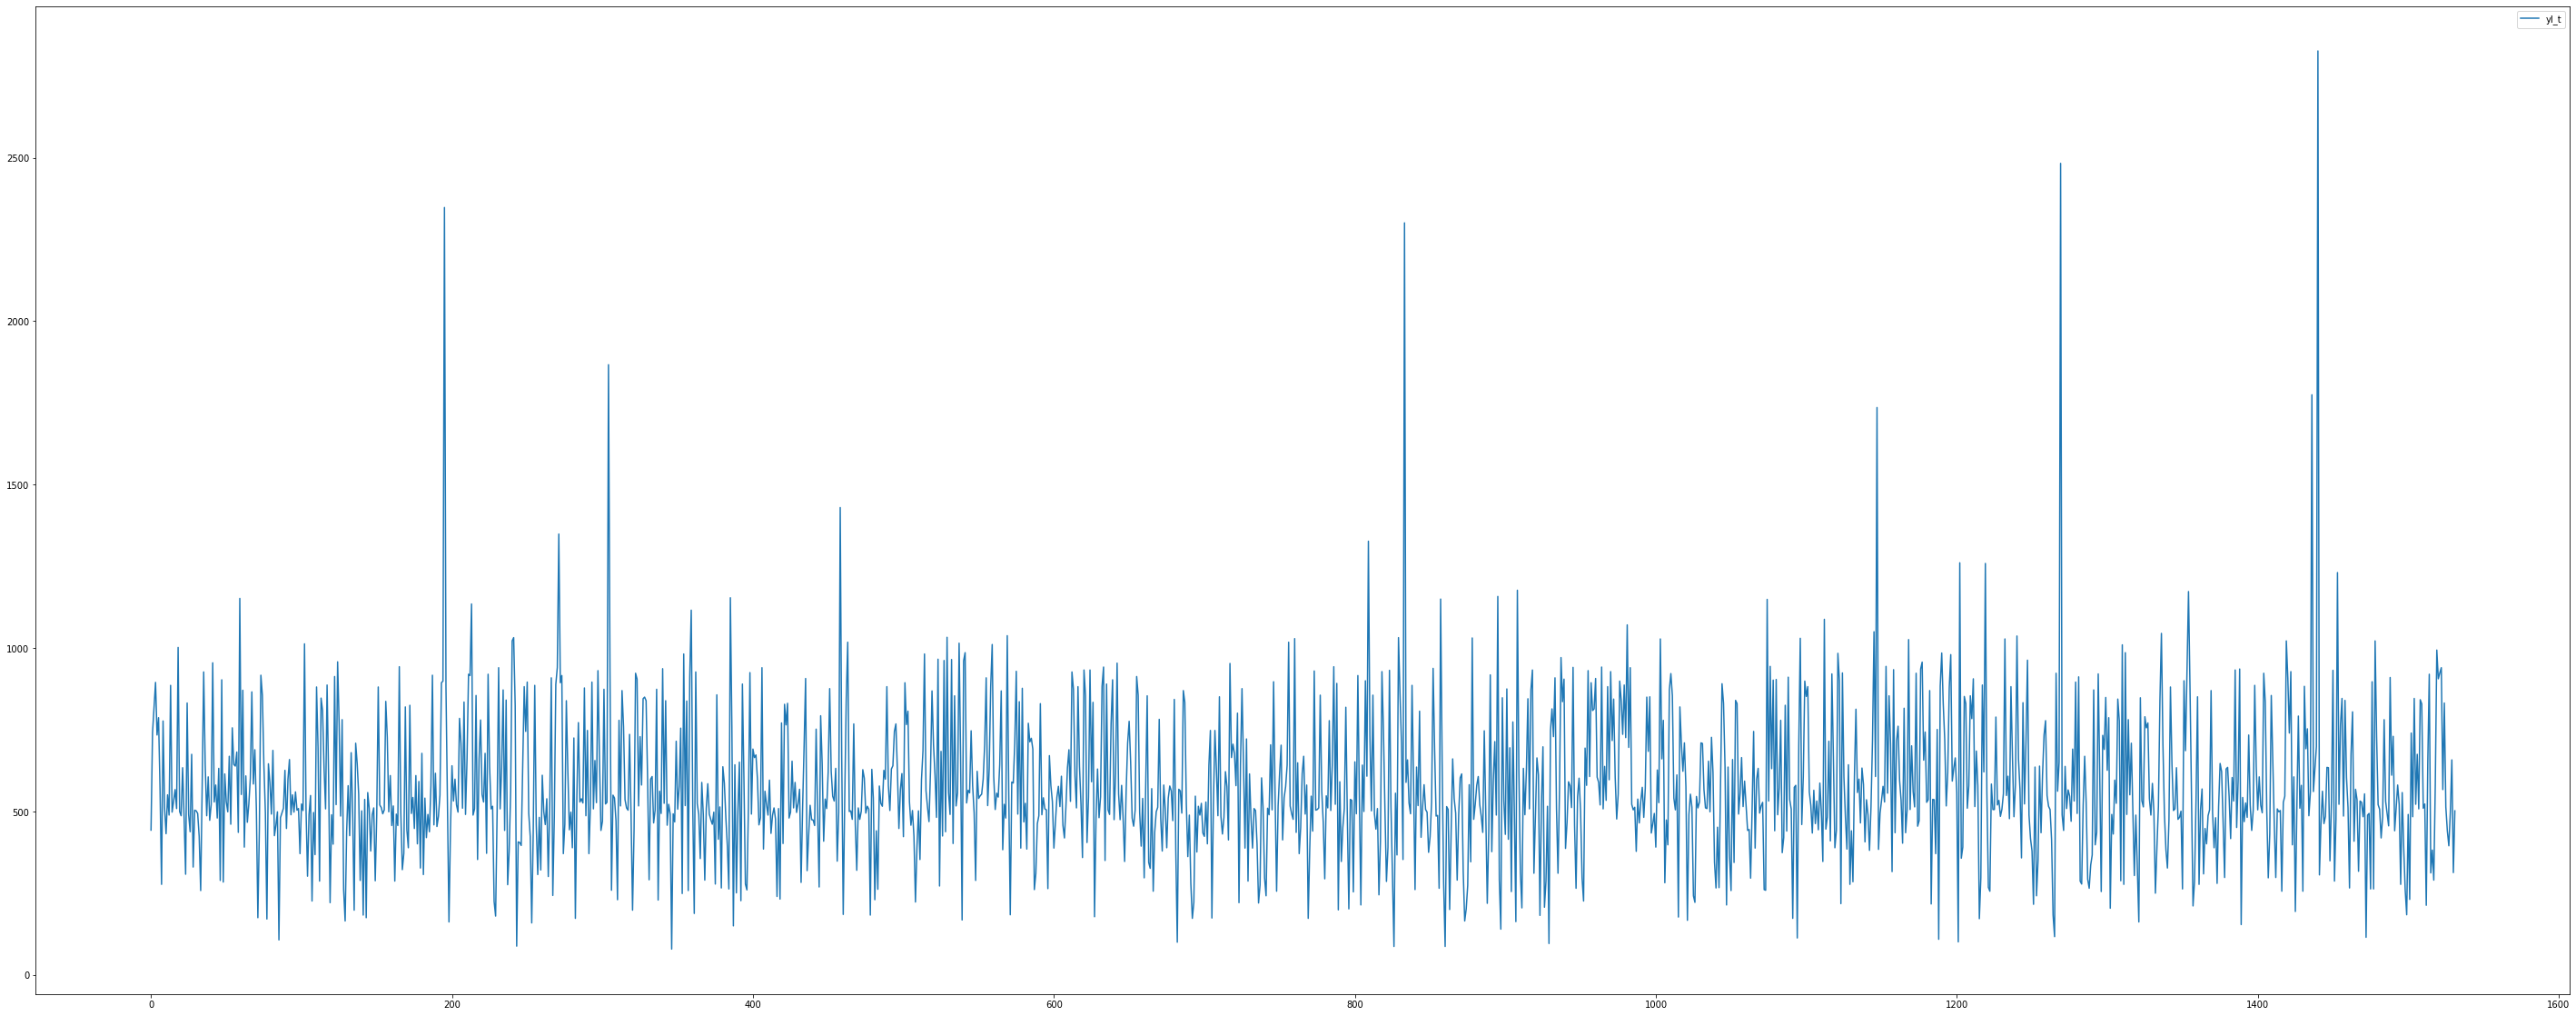

In [30]:

yl_tp.plot(y= ['yl_t'],figsize=(50, 20))


<AxesSubplot:>

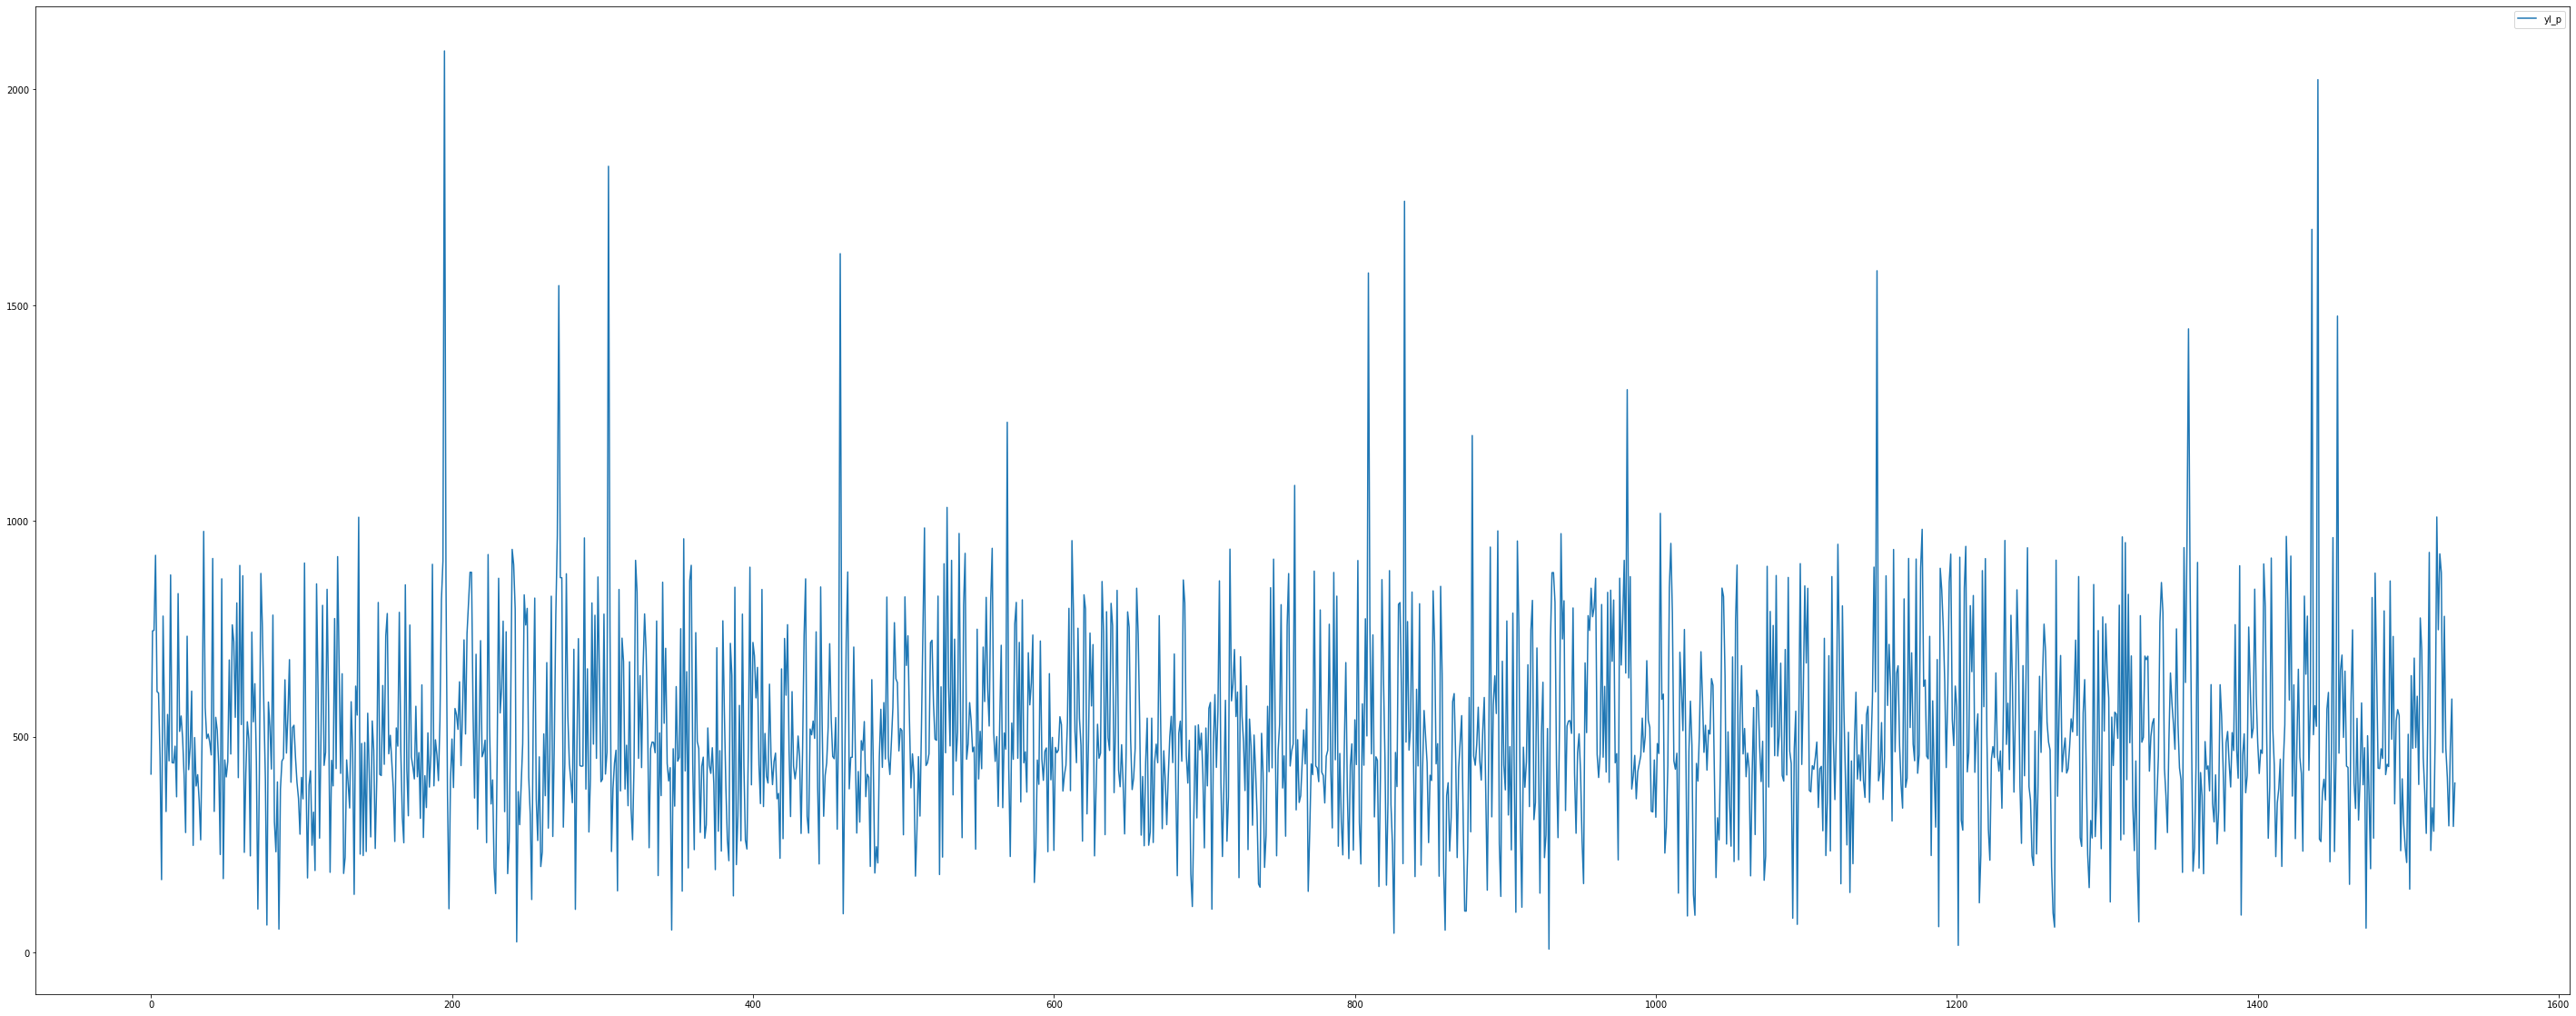

In [31]:
yl_tp.plot(y= ['yl_p'],figsize=(50, 20))


<AxesSubplot:>

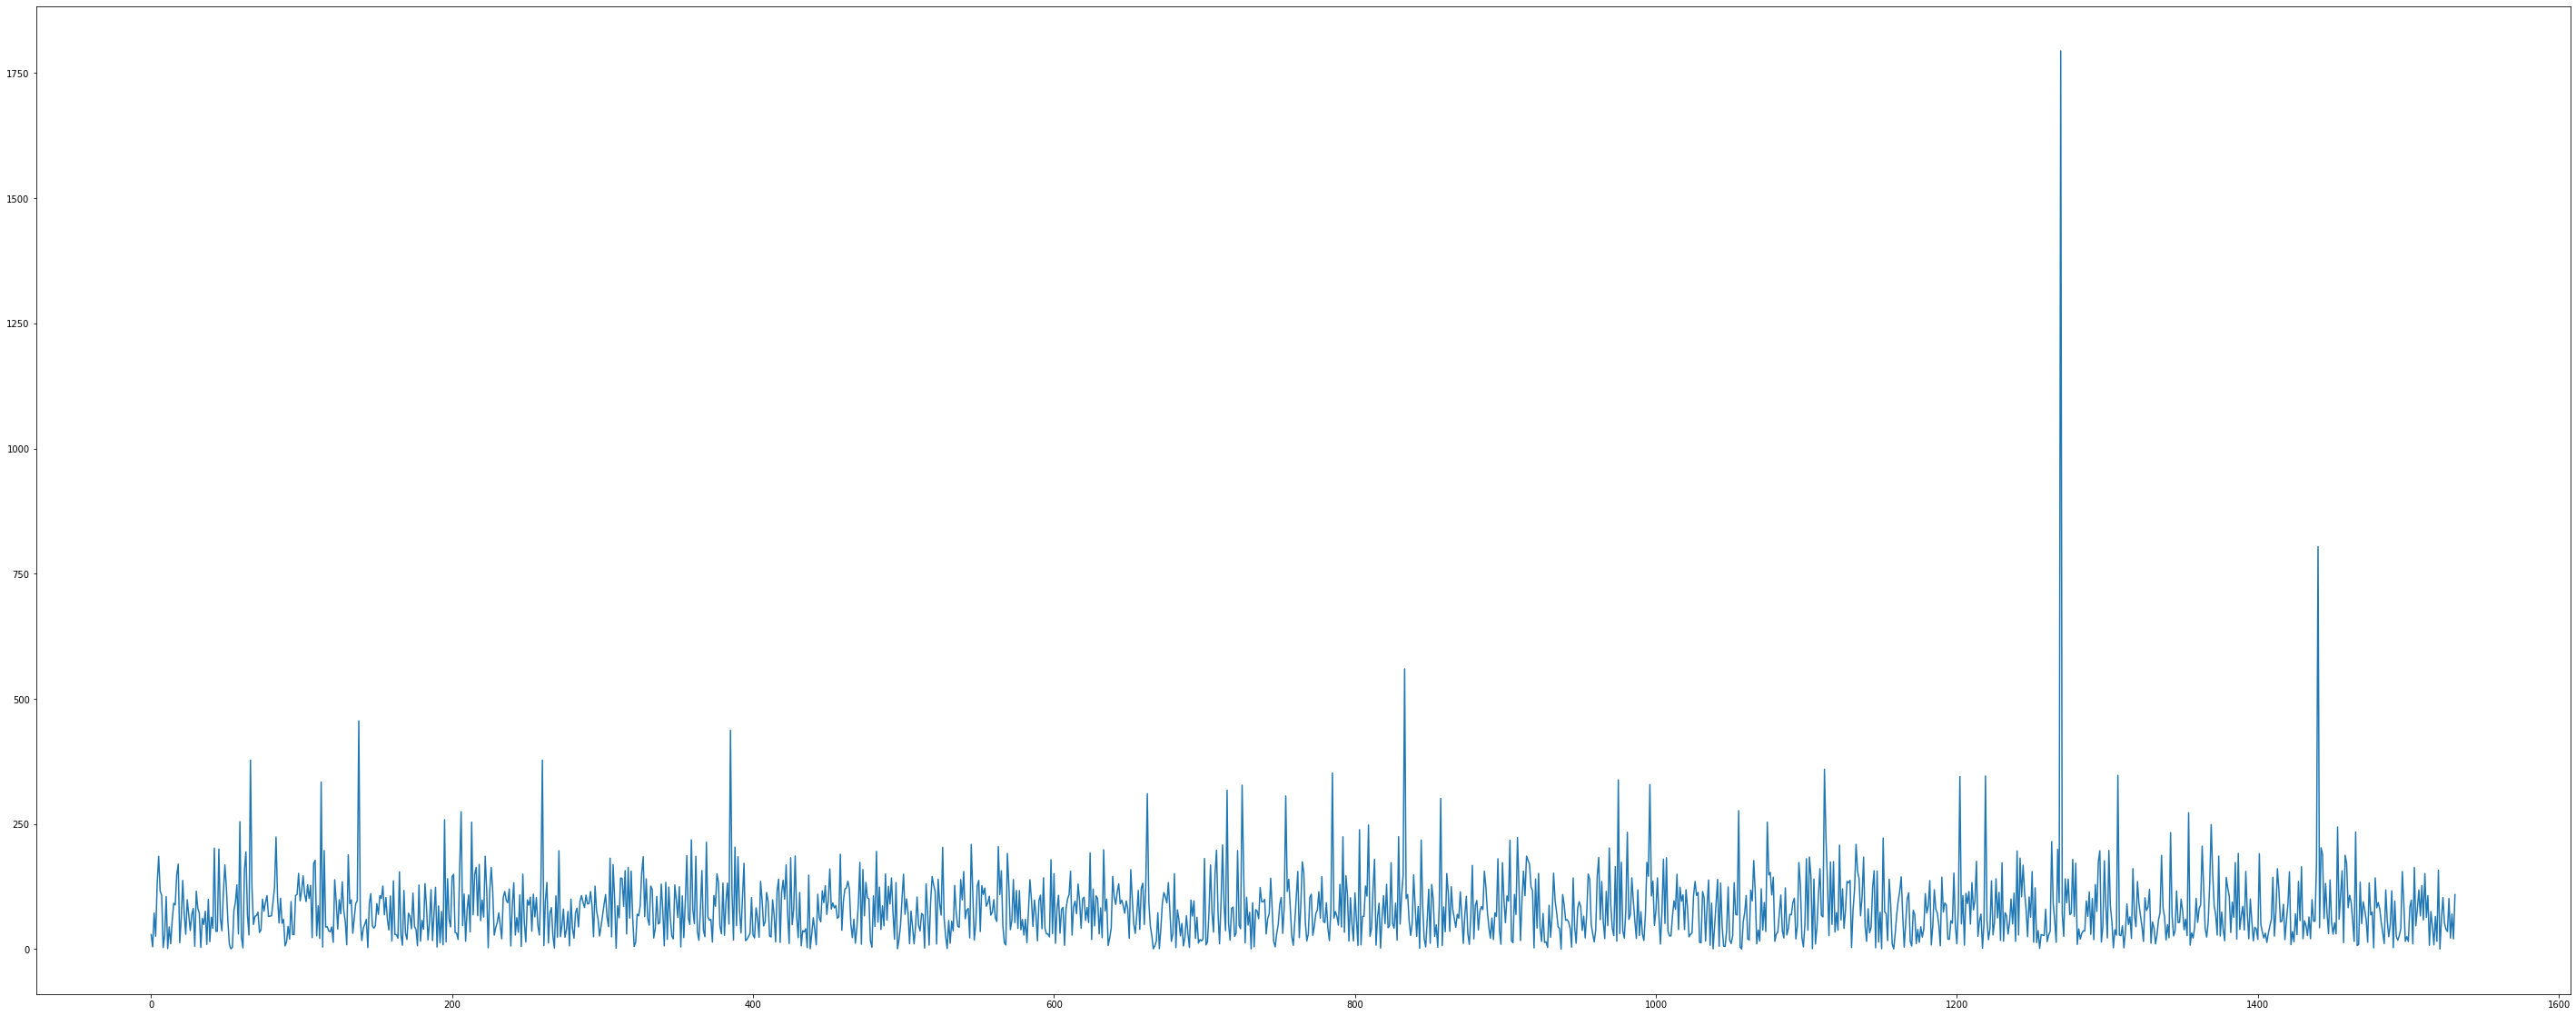

In [32]:
yl_d = abs(yl_t -yl_p)
# print(yl_d)
yl_d.plot(figsize=(50, 20))

<AxesSubplot:>

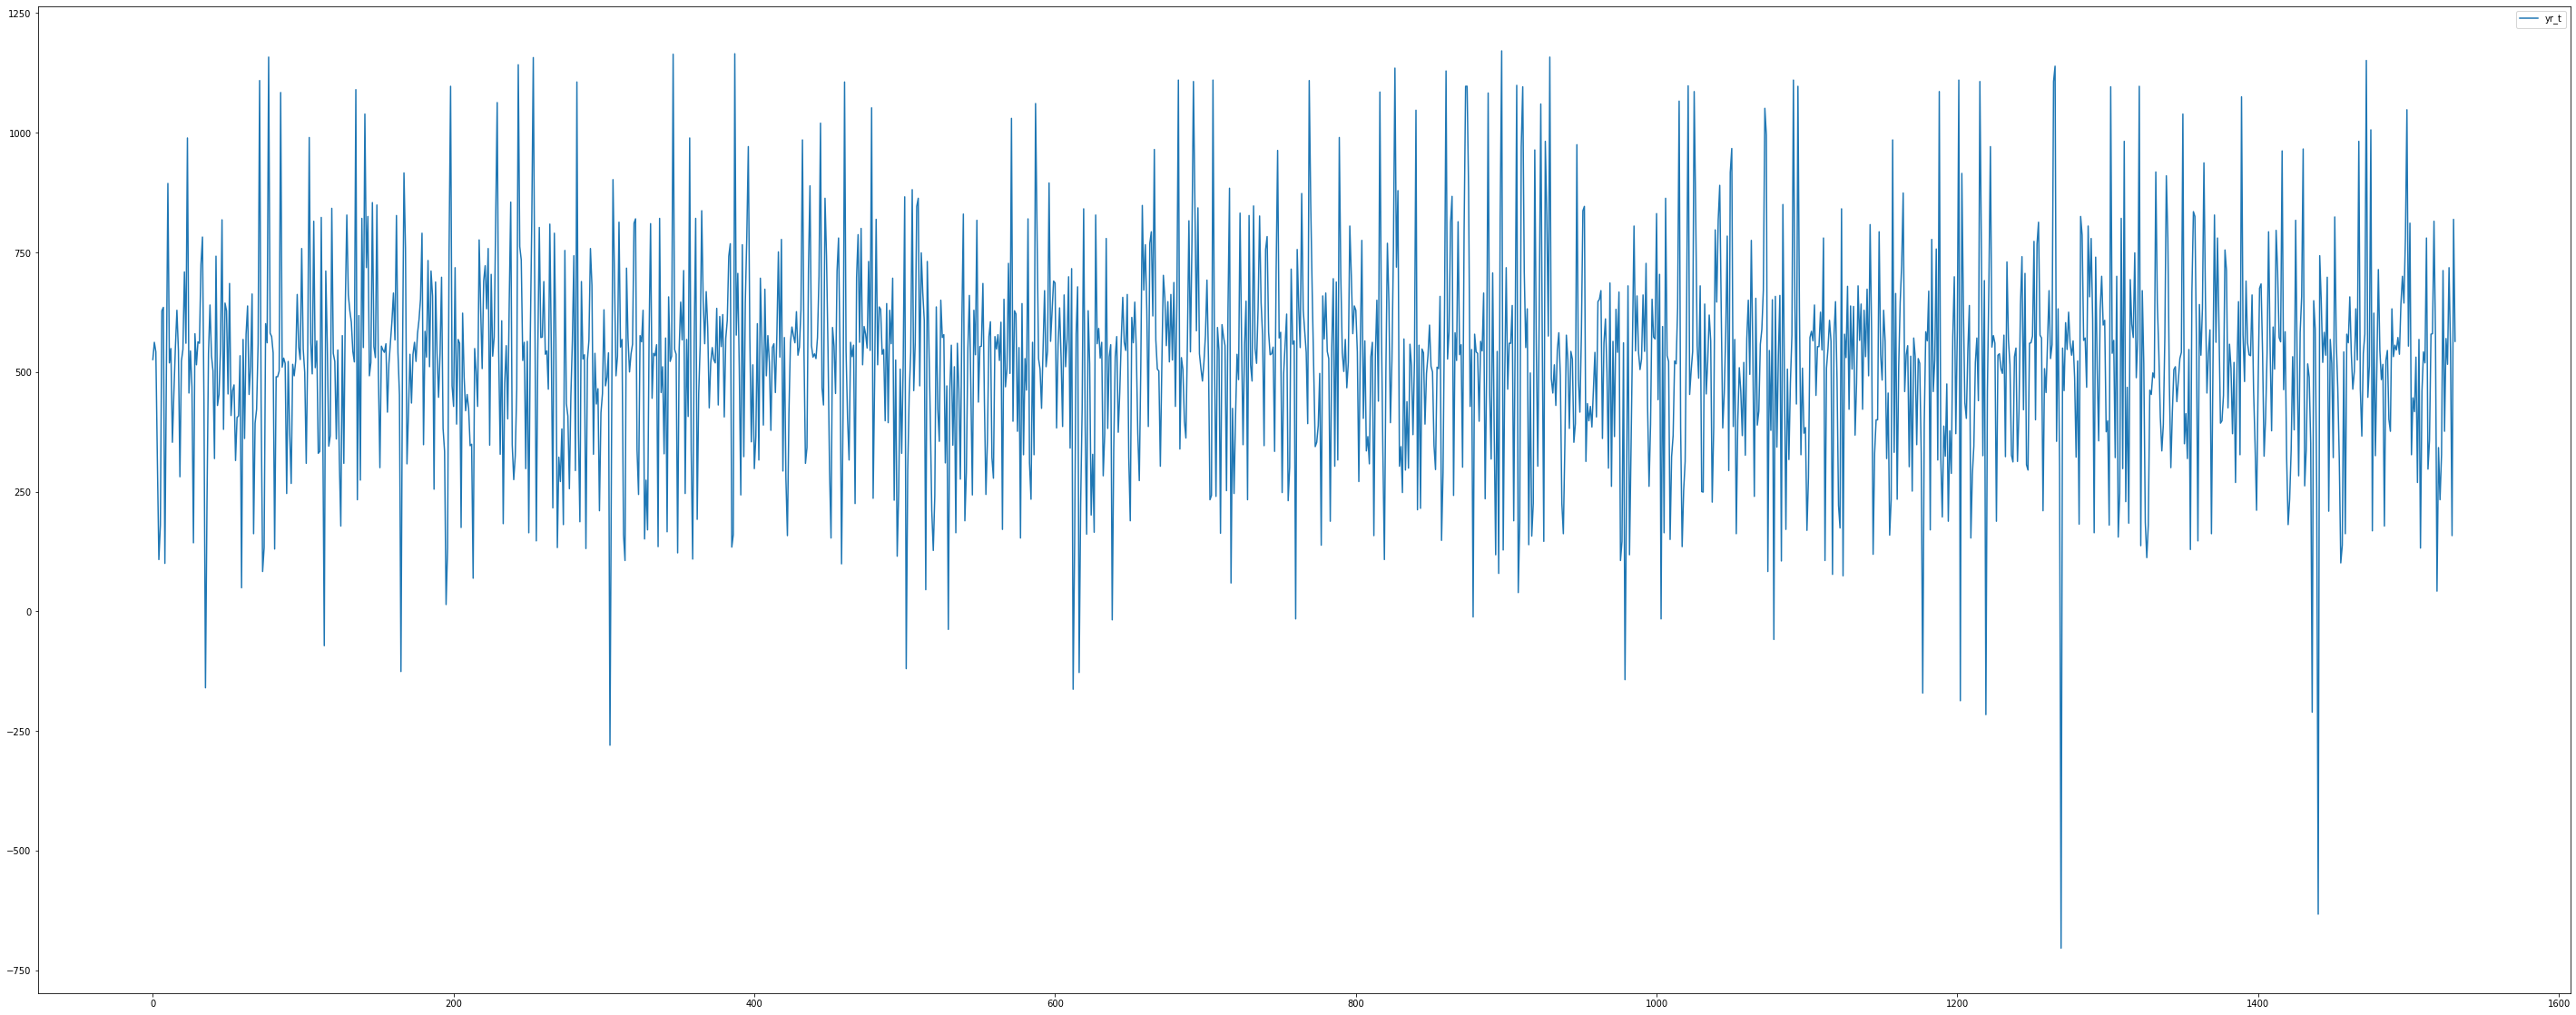

In [33]:
yr_tp.plot(y= ['yr_t'],figsize=(50, 20))

<AxesSubplot:>

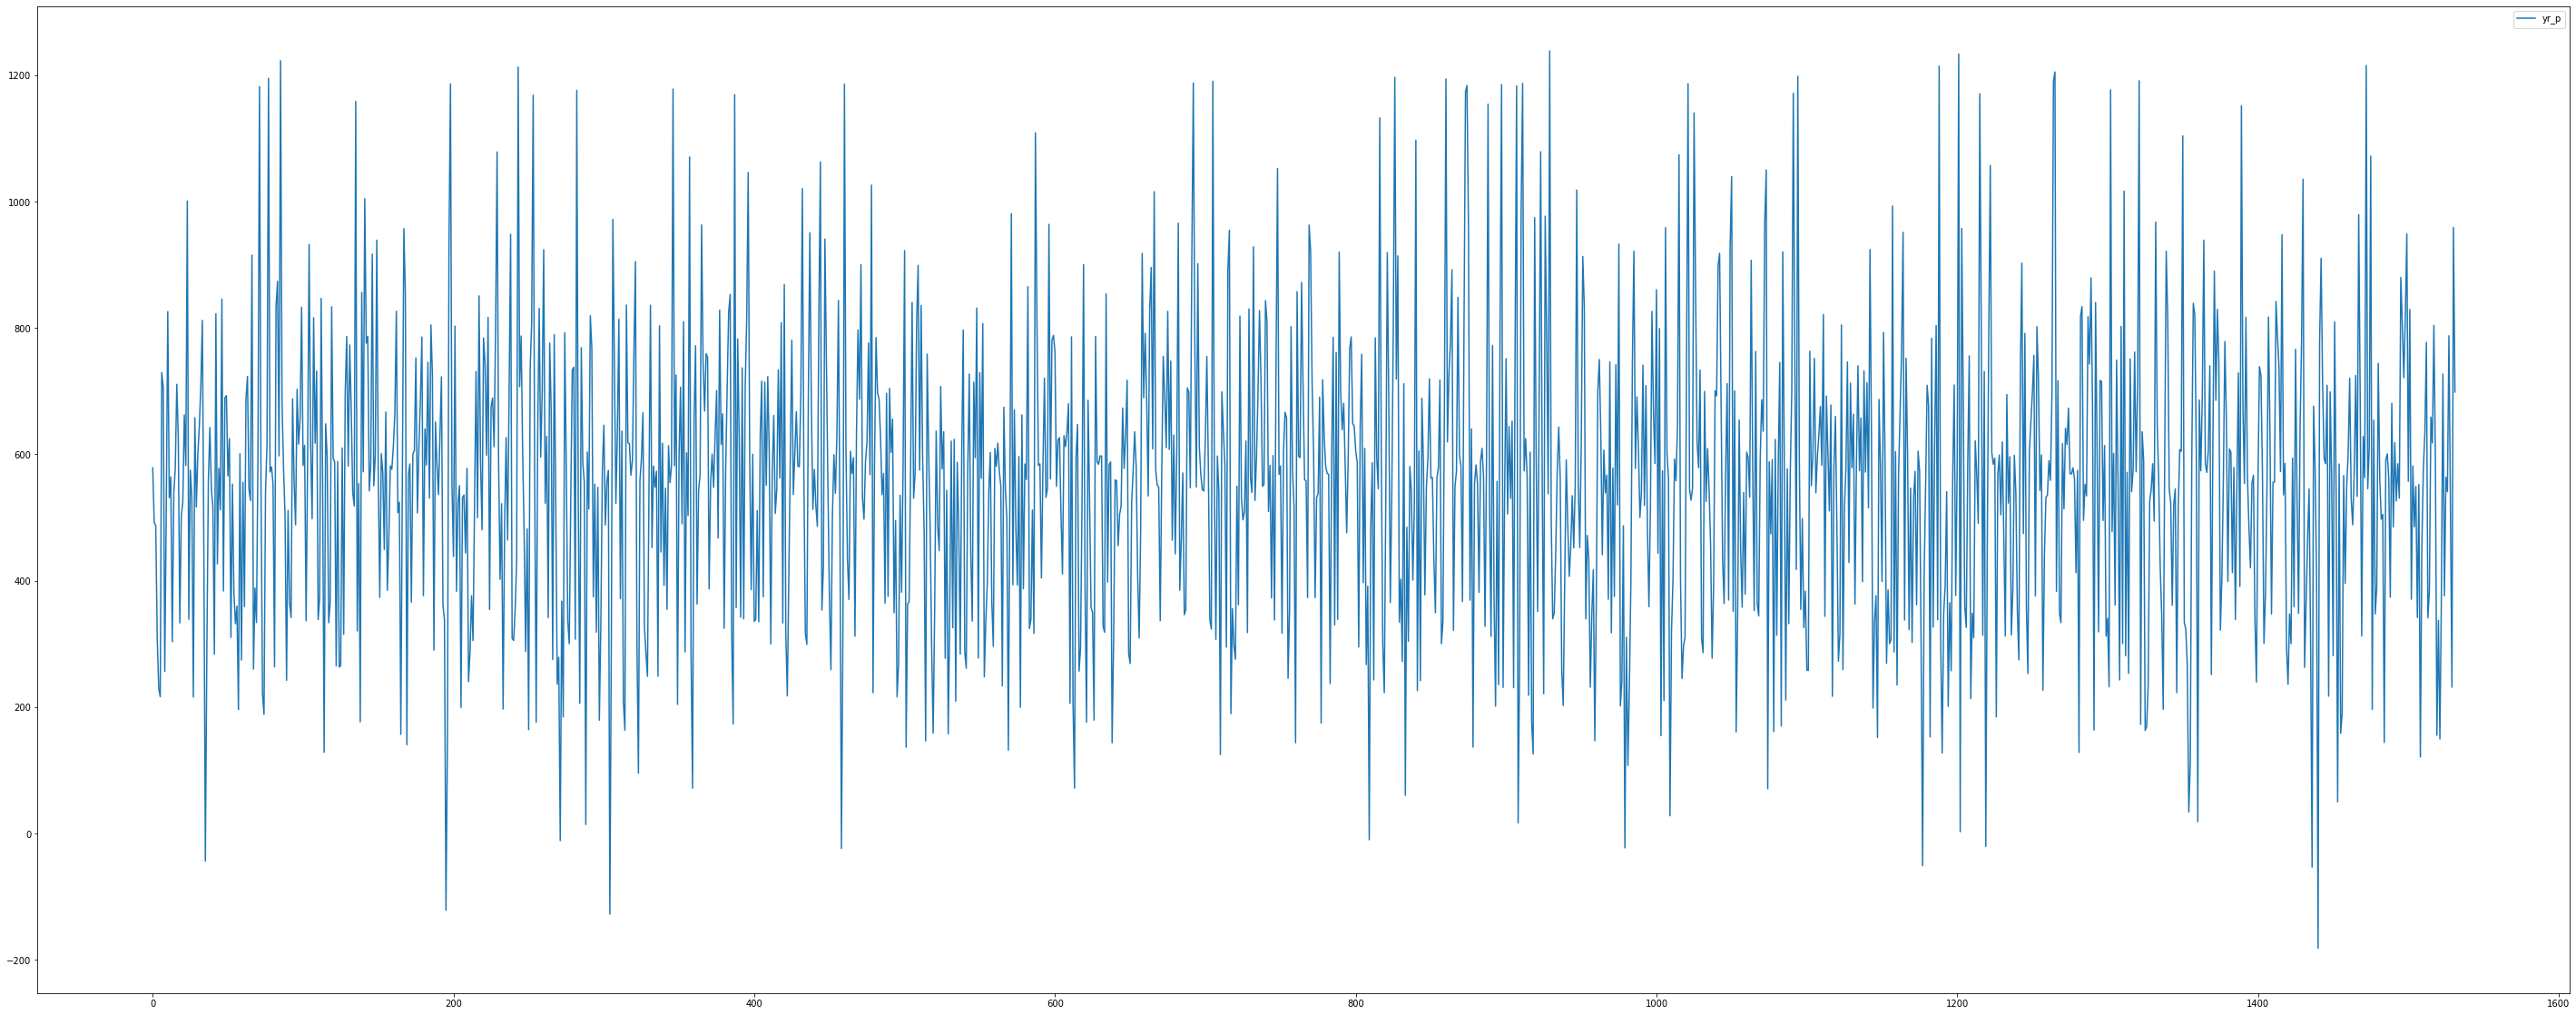

In [34]:
yr_tp.plot(y= ['yr_p'],figsize=(50, 20))


<AxesSubplot:>

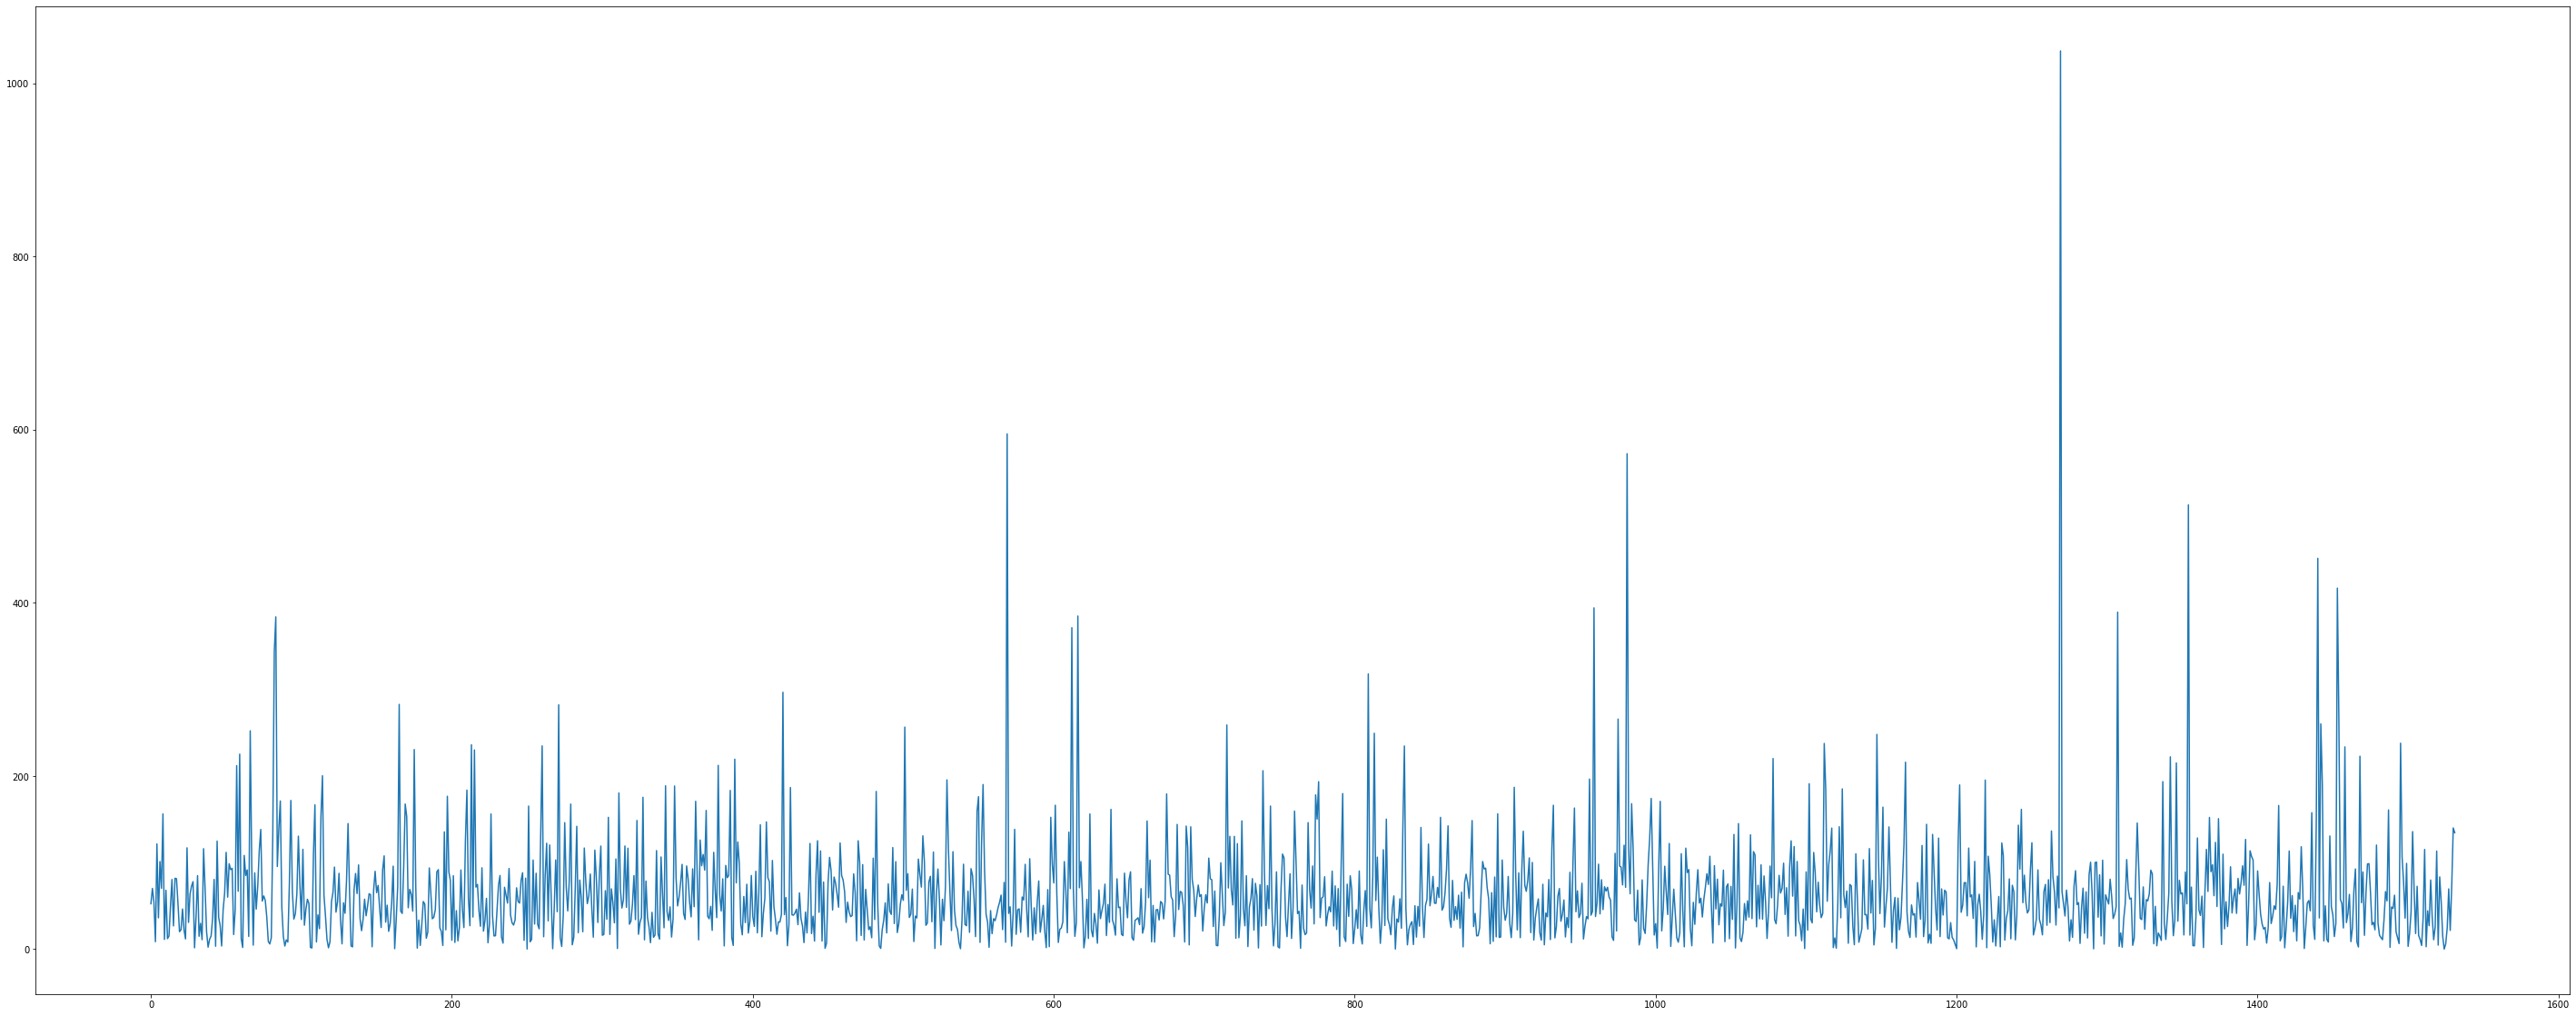

In [36]:
yr_d = abs(yr_t -yr_p)
# print(yl_d)
yr_d.plot(figsize=(50, 20))